In [1]:
%load_ext autoreload
%autoreload 2

import gym
import numpy as np
from deep_crossentropy_method import DeepCrossEntropyMethod
from IPython.display import clear_output
import time

In [2]:
env = gym.make("CartPole-v0")
env.reset()
# env.render()

array([ 0.04963497,  0.02206866, -0.01953376,  0.04636702])

#### Deep cross entropy method

In [44]:
def generate_session(env, agent, t_max=1000,render_session=False):
    """
    Play a single game using agent neural network.
    Terminate when game finishes or after :t_max: steps
    """
    states, actions = [], []
    total_reward = 0

    s = env.reset()
    for _ in range(t_max):      
        # use agent to predict a vector of action probabilities for state :s:
        probs = agent.predict_proba([s]).flatten()
        a = np.random.choice(env.action_space.n,p = probs)
        new_s, r, done, _ = env.step(a)
        states.append(s)
        actions.append(a)
        total_reward += r
        s = new_s
        if render_session:
            env.render()
            clear_output(True)
            time.sleep(0.5)
        if done:
            break
    return states, actions, total_reward

In [35]:
from sklearn.neural_network import MLPClassifier
def agent_factory(env,hidden_layer_sizes=(20, 20)):
    def create_agent():
        agent = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation='tanh',
        )
        X=[env.reset()] * env.action_space.n
        y=range(env.action_space.n)
        agent.partial_fit(X, y, y)
        return agent
    return create_agent

mean reward = 192.240, threshold=200.000


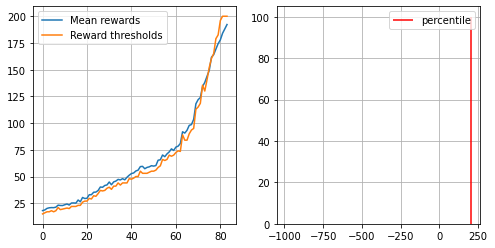

In [41]:
dcem=DeepCrossEntropyMethod(env=env,agent_factory_fn=agent_factory(env=env,hidden_layer_sizes=(2, 8)),session_generator_fn=generate_session)
dcem.train(mean_reward_stop=190,percentile=30)

In [42]:
sessions=dcem.evaluate_policy()
_, _, session_rewards = zip(*sessions)
mean_reward = np.mean(session_rewards)
print(f'Session mean reward:{np.mean(mean_reward)}')

Session mean reward:191.944


In [3]:
dcem.render_policy()